# 7 贝叶斯网络

贝叶斯网络 (Bayesian network) 是有向无换图 (directed acyclic graph, DAG), 每一个节点代表一个事件, 可以记录各个事件发生的概率关系.

<br>

若有 $n$ 个事件, 则每个事件**发生与否**会产生 $2^n$ 种组合, 每种组合对应它发生的联合概率.

如果直接存储每种组合出现的联合概率, 则占用存储空间极大. 但是, 可以利用事件之间的独立性等关系, 用图 (graph) 存储减少空间, 这就是贝叶斯网络.

In [74]:
import networkx as nx
from matplotlib import pyplot as plt
def plotgraph(G, title = '', labels = None, color = 'lightgray', seed = 0, show = True):
    plt.gca().set_title(title)
    pos = nx.spring_layout(G, seed = seed)
    nx.draw_networkx_nodes(G, node_size = 600, pos=pos, node_color = color)
    nx.draw_networkx_edges(G, pos=pos, arrowsize = 20)
    if labels is not None:
        nx.draw_networkx_labels(G, pos, labels = labels, font_size=20) 
    plt.gca().axis('off')
    if show: plt.show()

如下图 A→B→C→D 是一个链状的有向无环图. 它表示事件A发生与否直接影响事件B, 事件B发生与否直接影响事件C, 事件C发生与否直接影响事件 D.

$$\mathbb P(A=a,B=b,C=c,D=d) = \mathbb P(D=d|C=c)\cdot\mathbb P(C=c|B=b)\cdot \mathbb P(B=b|A=a)\mathbb P(A = a).$$

即事件 "$A=a,B=b,C=c,D=d$" 的概率可以由若干个条件概率相乘得到, 且之前的事件只对下一个产生直接影响. 简写为
$$\mathbb P(A,B,C,D) = \mathbb P(D|C)\cdot\mathbb P(C|B)\cdot \mathbb P(B|A)\cdot \mathbb P(A).$$

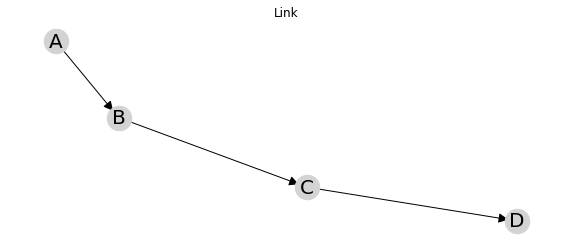

In [33]:
plt.figure(figsize = (10, 4), facecolor='white')
G = nx.DiGraph()
[G.add_node(i) for i in range(4)]
[G.add_edge(i, i+1) for i in range(3)]
plotgraph(G, 'Link', labels = dict(zip(range(4), 'ABCD')), seed = 1108)

## 条件独立性

贝叶斯网络可以研究已知一些事件的状态, 其它事件发生的独立性关系.

### 链独立性

例如: 下图 A→B→C→D 是一个链状的有向无环图. 若事件 $C$ 已知, 则在条件概率的意义下, 事件 B,D 独立. (事件 $A,D$ 也独立)

直观上来看, 已知 $C$ 切断了 $B$ 传导到 $D$ 的影响. 这也可以利用定义证明:

**证明** 
$$\mathbb P(B,D|C) = \frac{\mathbb P(B,C,D)}{\mathbb P(C)} = \frac{\mathbb P(D|C)\mathbb P(C|B)\mathbb P(B)}{\mathbb P(C)}=\mathbb P(D|C)\mathbb P(B|C)$$

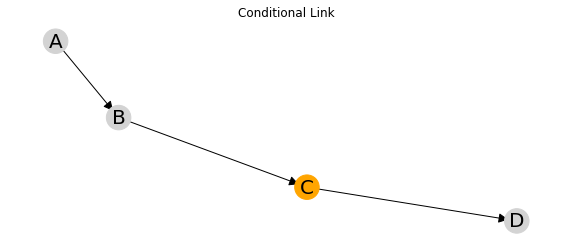

In [38]:
plt.figure(figsize = (10, 4), facecolor='white')
G = nx.DiGraph()
[G.add_node(i) for i in range(4)]
[G.add_edge(i, i+1) for i in range(3)]
plotgraph(G, 'Conditional Link', labels = dict(zip(range(4), 'ABCD')), seed = 1108, color = ['lightgray','lightgray','orange','lightgray'])

### 激活

为了研究更复杂的条件独立性问题, 引入激活的概念: 如下图所示, 橙色表示已知的事件节点, 灰色为未知, 有四种激活的三元组与三种不激活的三元组.


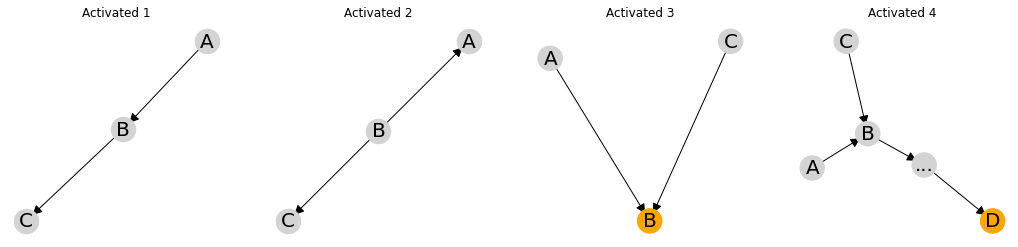

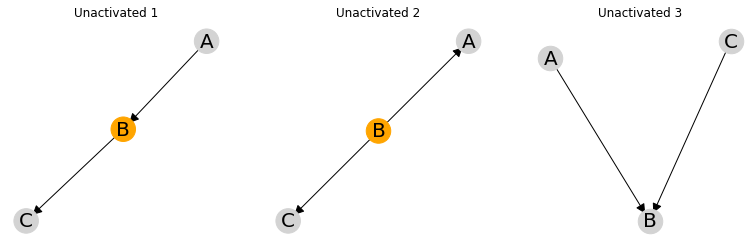

In [109]:
plt.figure(figsize = (18, 4), facecolor='white')
for ind in range(4):
    plt.subplot(1, 4, ind + 1)
    G = nx.DiGraph()
    if ind <= 1:
        [G.add_node(i) for i in range(3)]
        [G.add_edge(a, b) for a, b in ((ind, 1-ind), (1,2))]
        seed, labels, color = 8, dict(zip(range(3), 'ABC')), 'lightgray'
    elif ind == 2:
        [G.add_node(i) for i in range(3)]
        [G.add_edge(a, b) for a, b in ((0,1), (2,1))]
        seed, labels, color = 6, dict(zip(range(3), 'CBA')), ['lightgray', 'orange', 'lightgray']
    elif ind == 3:
        [G.add_node(i) for i in range(5)]
        [G.add_edge(a, b) for a, b in ((0,1), (2,1), (1,3), (3,4))]
        seed, labels, color = 2026, dict(zip(range(5), ['A','B','C','...','D'])), ['lightgray','lightgray','lightgray','lightgray','orange']

    plotgraph(G, 'Activated %d'%(ind + 1), seed = seed, labels = labels, color = color, show = False)
plt.show()

plt.figure(figsize = (18, 4), facecolor='white')
for ind in range(3):
    plt.subplot(1, 4, ind + 1)
    G = nx.DiGraph()
    if ind <= 1:
        [G.add_node(i) for i in range(3)]
        [G.add_edge(a, b) for a, b in ((ind, 1-ind), (1,2))]
        seed, labels, color = 8, dict(zip(range(3), 'ABC')), ['lightgray','orange','lightgray']
    elif ind == 2:
        [G.add_node(i) for i in range(3)]
        [G.add_edge(a, b) for a, b in ((0,1), (2,1))]
        seed, labels, color = 6, dict(zip(range(3), 'CBA')), 'lightgray'

    plotgraph(G, 'Unactivated %d'%(ind + 1), seed = seed, labels = labels, color = color, show = False)
plt.show()

* 若一条路径存在非激活的三元组, 则该路径不激活.
* 对于两点 $A,B$ 若 $A$ 到 $B$ 存在一条**激活**路径, 则不独立.

例: 下图中已知 T, 则 L,B 不独立. 因为 L→R→**T**←B 中, 两个三元组 L→R→**T** 与 R→**T**←B 都是激活的, 所以该路径是激活的.

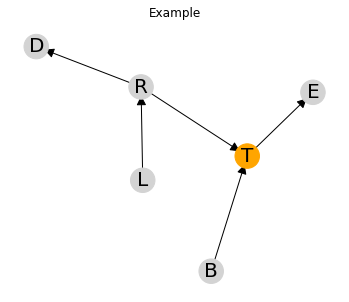

In [122]:
plt.figure(figsize = (6, 5))
G = nx.DiGraph()
[G.add_node(i) for i in range(6)]
[G.add_edge(a, b) for a, b in ((0,1), (1,3), (1,4), (2,4), (4,5))]
plotgraph(G, 'Example', labels = dict(zip(range(6), 'LRBDTE')), color = ['orange' if i in (4,) else 'lightgray' for i in range(6)], seed = 2)

## 马尔可夫覆盖

**定理** 对于一个节点 $X$, 定义它的马尔可夫覆盖为一个节点集合: $X$ 所有的父节点、所有的子节点、所有的子节点的父节点. 


若 $X$ 马尔可夫覆盖中所有点已知, 则 $X$ 与其他点节点均独立.

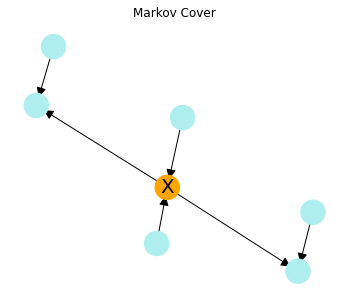

In [136]:
plt.figure(figsize = (6, 5))
G = nx.DiGraph()
[G.add_node(i) for i in range(7)]
[G.add_edge(a, b) for a, b in ((1,0), (2,0), (0,3), (0,4), (5,3), (6,4))]
plotgraph(G, 'Markov Cover', labels = {0: 'X'}, color = ['orange'] + ['PaleTurquoise'] * 6, seed = 8)